### 1. Importing Libraries and Modules

In [1]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt

import config as conf

from data.mnist import Mnist

### 2. Loading MNIST Dataset and Training Results

In [2]:
loader = Mnist()

model_rslt_name = "%s-results.pickle" % conf.MODEL_NAME

model_save_path = os.path.join(conf.MODEL_SAVE_DIR, conf.MODEL_NAME)
model_rslt_path = os.path.join(model_save_path, model_rslt_name)

with open(model_rslt_path, "rb") as f:
    generator_loss_mean, discriminator_loss_mean, gs = pickle.load(f)

### 3. Ploting the Generator and Discriminator Losses

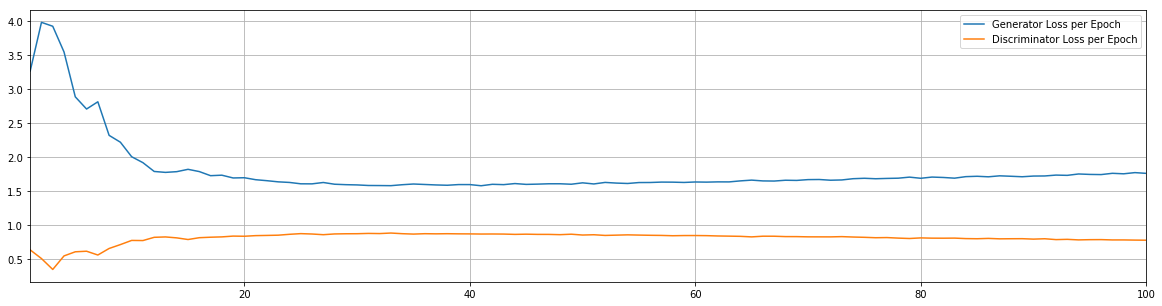

In [3]:
t = np.arange(1, len(generator_loss_mean)+1)
plt.figure(figsize=[20, 5], facecolor="white")
plt.plot(t, generator_loss_mean, label="Generator Loss per Epoch")
plt.plot(t, discriminator_loss_mean, label="Discriminator Loss per Epoch")
plt.xlim(1, 100)
plt.grid()
plt.legend()
plt.show()

### 4. Image Generation Results

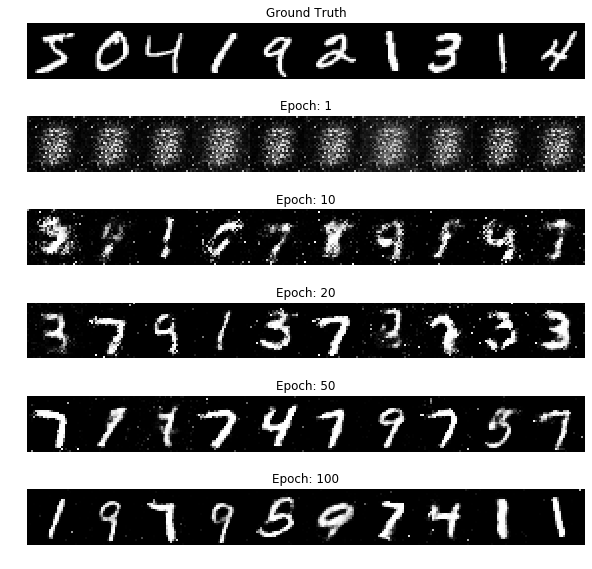

In [4]:
view_list = [1, 10, 20, 50, 100]

fig, axs = plt.subplots(nrows=1+len(view_list), figsize=[10, 10], facecolor="white")
axs[0].imshow(np.hstack(np.reshape(loader.train_features[:10], newshape=[10]+loader.feature_shape)), cmap="gray")
axs[0].set_title("Ground Truth")
axs[0].axis("off")

for i, idx in enumerate(view_list, 1):
    g = gs[idx-1]
    axs[i].imshow(np.hstack(np.reshape(g, newshape=[10]+loader.feature_shape)), cmap="gray")
    axs[i].set_title("Epoch: %i" % idx)
    axs[i].axis("off")
    
plt.savefig(os.path.join(model_save_path, "image_generation_results.png"))